In [1]:
import os, shutil
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [2]:
original_dataset_dir = r'C:\Users\EmmanuelOkyereGyaten\Downloads\dogs_vs_cats\train'
print(len(os.listdir(original_dataset_dir)))

25000


In [3]:
base_dir = r"C:\Users\EmmanuelOkyereGyaten\Downloads\cats_dogs_small"
os.makedirs(base_dir,exist_ok = True)

In [4]:
train_dir = os.path.join(base_dir, "train")
os.makedirs(train_dir, exist_ok = True)
validation_dir = os.path.join(base_dir, "validation")
os.makedirs(validation_dir, exist_ok = True)
test_dir = os.path.join(base_dir, "test")
os.makedirs(test_dir, exist_ok = True)
train_cat_dir = os.path.join(train_dir, "cats")
os.makedirs(train_cat_dir,exist_ok = True)
train_dog_dir = os.path.join(train_dir, "dogs")
os.makedirs(train_dog_dir,exist_ok = True)
validation_cat_dir = os.path.join(validation_dir, "cats")
os.makedirs(validation_cat_dir,exist_ok = True)
validation_dog_dir = os.path.join(validation_dir, "dogs")
os.makedirs(validation_dog_dir,exist_ok = True)
test_cat_dir = os.path.join(test_dir, "cats")
os.makedirs(test_cat_dir,exist_ok = True)
test_dog_dir = os.path.join(test_dir, "dogs")
os.makedirs(test_dog_dir,exist_ok = True)

In [50]:

file_names = ["cat.{}.jpg".format(i) for i in range(1000)]
for i in file_names:
    source = os.path.join(original_dataset_dir, i)
    destination = os.path.join(train_cat_dir,i)
    shutil.copyfile(source, destination)

In [51]:
file_names = ["cat.{}.jpg".format(i) for i in range(1000,1500)]
for i in file_names:
    source = os.path.join(original_dataset_dir,i)
    destination = os.path.join(validation_cat_dir, i)
    shutil.copyfile(source, destination)

In [52]:
file_name = ["cat.{}.jpg".format(i) for i in range(1500, 2000)]
for i in file_name:
    source = os.path.join(original_dataset_dir,i)
    destination = os.path.join(test_cat_dir, i)
    shutil.copyfile(source, destination)

In [53]:
file_name = ["dog.{}.jpg".format(i) for i in range(1000)]
for i in file_name:
    source = os.path.join(original_dataset_dir, i)
    destination = os.path.join(train_dog_dir,i)
    shutil.copyfile(source, destination)

In [54]:
file_name = ["dog.{}.jpg".format(i) for i in range(1000, 1500)]
for i in file_name:
    source = os.path.join(original_dataset_dir, i)
    destination = os.path.join(validation_dog_dir,i)
    shutil.copyfile(source, destination)

In [55]:
file_name = ["dog.{}.jpg".format(i) for i in range(1500, 2000)]
for i in file_name:
    source = os.path.join(original_dataset_dir, i)
    destination = os.path.join(test_dog_dir,i)
    shutil.copyfile(source, destination)

In [9]:
print(len(os.listdir(train_dir)))

2


In [5]:
from keras import models
from keras import layers

In [6]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation = "relu",input_shape = (150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation = "relu"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation = "relu"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation = "relu"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation = "relu"))
model.add(layers.Dense(1, activation ="sigmoid"))

In [7]:
model.compile(loss = "binary_crossentropy", optimizer = "rmsprop", metrics = ["accuracy"])

In [8]:
import matplotlib.pyplot as plt

In [9]:
train_datagen = ImageDataGenerator(rescale = 1./255) #, rotation_image = 40, width_shift_range =0.2, height_shift_range = 0.2, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True
test_datagen = ImageDataGenerator(rescale = 1./255)

In [10]:
train_generator = train_datagen.flow_from_directory(train_dir, target_size = (150,150), batch_size = 20, class_mode ='binary')

Found 2000 images belonging to 2 classes.


In [11]:
validation_generator = test_datagen.flow_from_directory(validation_dir, target_size = (150,150), batch_size = 20, class_mode = 'binary' )

Found 1000 images belonging to 2 classes.


In [12]:
for i , j in train_generator:
    print(i.shape)
    print(j.shape)
    break

(20, 150, 150, 3)
(20,)


In [25]:
history = model.fit_generator(train_generator, steps_per_epoch = 100, epochs = 30, validation_data = validation_generator, validation_steps = 50 )

C:\Users\EMMANU~1\AppData\Local\Temp/ipykernel_18216/2196012098.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator, steps_per_epoch = 100, epochs = 30, validation_data = validation_generator, validation_steps = 50 )


Epoch 1/30
100/100 [==============================] - 78s 757ms/step - loss: 0.7058 - accuracy: 0.5270 - val_loss: 0.7285 - val_accuracy: 0.5070
Epoch 2/30
100/100 [==============================] - 63s 629ms/step - loss: 0.6846 - accuracy: 0.5840 - val_loss: 0.6069 - val_accuracy: 0.6620
Epoch 3/30
100/100 [==============================] - 62s 618ms/step - loss: 0.6303 - accuracy: 0.6595 - val_loss: 0.5922 - val_accuracy: 0.6870
Epoch 4/30
100/100 [==============================] - 63s 628ms/step - loss: 0.5811 - accuracy: 0.6980 - val_loss: 0.6218 - val_accuracy: 0.6840
Epoch 5/30
100/100 [==============================] - 62s 618ms/step - loss: 0.5490 - accuracy: 0.7390 - val_loss: 0.5390 - val_accuracy: 0.7440
Epoch 6/30
100/100 [==============================] - 64s 640ms/step - loss: 0.4995 - accuracy: 0.7535 - val_loss: 0.5889 - val_accuracy: 0.7350
Epoch 7/30
100/100 [==============================] - 62s 620ms/step - loss: 0.4829 - accuracy: 0.7720 - val_loss: 0.7524 - val_ac

In [26]:
model.save('cats_and_dogs_small_1.h5')

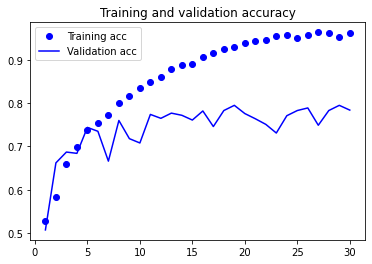

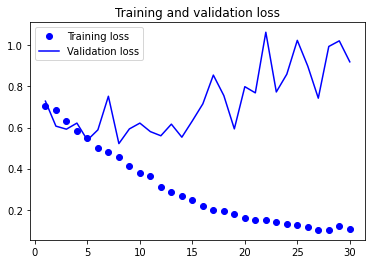

In [28]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [20]:
#Using Data Augmentation
datagen = ImageDataGenerator(
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode='nearest')

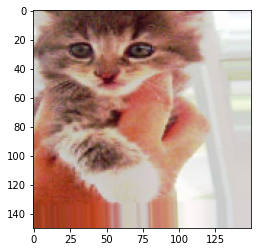

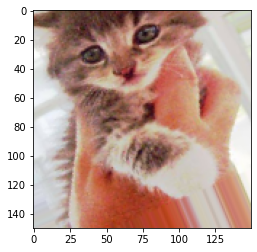

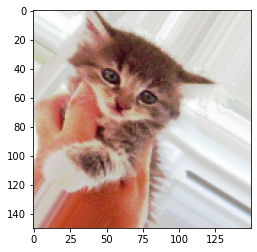

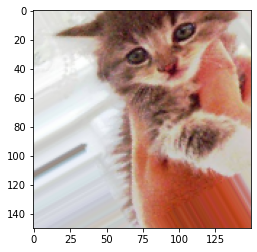

In [21]:
#Displaying some random augmented training Images
from keras.preprocessing import image
fnames = [os.path.join(train_cat_dir,fname) for fname in os.listdir(train_cat_dir)]
img_path = fnames[3]
img = image.load_img(img_path, target_size = (150,150))
x = image.img_to_array(img)
x = x.reshape((1,) +x.shape)
i = 0
for batch in datagen.flow(x, batch_size = 1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i +=1
    if i% 4==0:
        break
plt.show()

In [22]:
#Defining a new covnet that includes dropout
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation = "relu", input_shape = (150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation = "relu"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation = "relu"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation = "relu"))
model.add(layers.Dense(1, activation = "sigmoid"))

In [23]:
model.compile(loss = 'binary_crossentropy', optimizer = 'rmsprop', metrics = ["accuracy"])

In [24]:
train_datagen =  ImageDataGenerator(rescale = 1./255, rotation_range = 40, width_shift_range =0.2, height_shift_range = 0.2, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)

In [25]:
test_datagen = ImageDataGenerator(rescale = 1./255) 

In [26]:
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150,150), batch_size = 20, class_mode = "binary")
validation_generator = test_datagen.flow_from_directory(validation_dir, target_size = (150,150), batch_size = 20,class_mode ='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [77]:
history = model.fit_generator(train_generator, steps_per_epoch = 100, epochs = 30, validation_data = validation_generator, validation_steps = 50 )

C:\Users\EMMANU~1\AppData\Local\Temp/ipykernel_18216/2196012098.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator, steps_per_epoch = 100, epochs = 30, validation_data = validation_generator, validation_steps = 50 )


Epoch 1/30
100/100 [==============================] - 69s 693ms/step - loss: 0.6677 - accuracy: 0.6025 - val_loss: 0.6231 - val_accuracy: 0.6520
Epoch 2/30
100/100 [==============================] - 69s 686ms/step - loss: 0.6495 - accuracy: 0.6355 - val_loss: 0.6237 - val_accuracy: 0.6470
Epoch 3/30
100/100 [==============================] - 73s 725ms/step - loss: 0.6562 - accuracy: 0.6540 - val_loss: 0.6106 - val_accuracy: 0.6810
Epoch 4/30
100/100 [==============================] - 68s 675ms/step - loss: 0.6341 - accuracy: 0.6495 - val_loss: 0.6259 - val_accuracy: 0.6080
Epoch 5/30
100/100 [==============================] - 68s 684ms/step - loss: 0.6170 - accuracy: 0.6515 - val_loss: 0.5634 - val_accuracy: 0.6880
Epoch 6/30
100/100 [==============================] - 69s 693ms/step - loss: 0.6030 - accuracy: 0.6820 - val_loss: 0.5729 - val_accuracy: 0.6860
Epoch 7/30
100/100 [==============================] - 68s 677ms/step - loss: 0.6021 - accuracy: 0.6820 - val_loss: 0.6131 - val_ac

In [79]:
model.save("cats_dogs_small_2.h5")

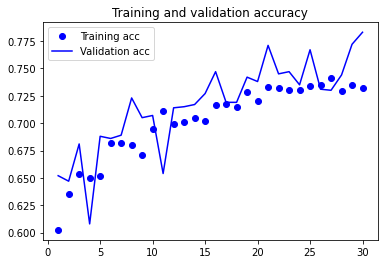

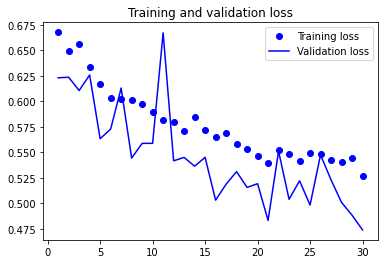

In [80]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [3]:
# from keras.applications import VGG16
from tensorflow.keras.applications import VGG16

In [4]:
conv_base = VGG16(weights = "imagenet", include_top = False, input_shape =(150,150,3))
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [29]:
#Extracting features using the pretrained convolutional base without augmentation
datagen = ImageDataGenerator(rescale = 1./255)
batch_size = 20
def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
    directory,
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='binary')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels

In [32]:
train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [33]:
train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))
test_features = np.reshape(test_features, (1000, 4 * 4 * 512))

In [38]:
model = models.Sequential()
model.add(layers.Dense(256, activation = 'relu', input_dim = 4*4*512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [40]:
model.compile(optimizer = 'rmsprop', loss = "binary_crossentropy", metrics = ["accuracy"])

In [42]:
history = model.fit(train_features, train_labels, epochs = 30, validation_data = (validation_features,validation_labels))

Epoch 1/30
63/63 [==============================] - 2s 35ms/step - loss: 0.0424 - accuracy: 0.9830 - val_loss: 0.5068 - val_accuracy: 0.8960
Epoch 2/30
63/63 [==============================] - 2s 34ms/step - loss: 0.0766 - accuracy: 0.9720 - val_loss: 0.3924 - val_accuracy: 0.9020
Epoch 3/30
63/63 [==============================] - 2s 34ms/step - loss: 0.0407 - accuracy: 0.9855 - val_loss: 0.5163 - val_accuracy: 0.8910
Epoch 4/30
63/63 [==============================] - 2s 33ms/step - loss: 0.0428 - accuracy: 0.9840 - val_loss: 0.5186 - val_accuracy: 0.8900
Epoch 5/30
63/63 [==============================] - 2s 33ms/step - loss: 0.0317 - accuracy: 0.9880 - val_loss: 0.4412 - val_accuracy: 0.8990
Epoch 6/30
63/63 [==============================] - 2s 33ms/step - loss: 0.0319 - accuracy: 0.9885 - val_loss: 0.5270 - val_accuracy: 0.9030
Epoch 7/30
63/63 [==============================] - 2s 34ms/step - loss: 0.0270 - accuracy: 0.9920 - val_loss: 0.6006 - val_accuracy: 0.8950
Epoch 8/30
63

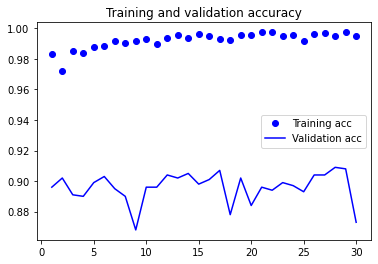

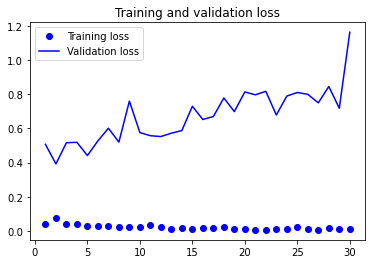

In [43]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [18]:
from keras.models import load_model
model = load_model("cats_and_dogs_small_1.h5")
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [7]:
img_path = r"C:\Users\EmmanuelOkyereGyaten\Downloads\cats_dogs_small\test\cats\cat.1700.jpg"

In [8]:
from keras.preprocessing import image

In [9]:
img = image.load_img(img_path, target_size = (150,150))
image_tensor = image.img_to_array(img)
image_tensor = np.expand_dims(image_tensor, axis = 0)
image_tensor/=255.

In [10]:
image_tensor.shape

(1, 150, 150, 3)

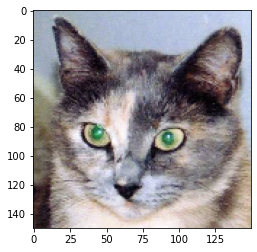

In [12]:
import matplotlib.pyplot as plt
plt.imshow(image_tensor[0])

In [15]:
layer_outputs = [layer.output for layer in model.layers[:8]]
activation_model = models.Model(inputs = model.input, outputs = layer_outputs)
activations = activation_model.predict(image_tensor)

In [17]:
first_layer = activations[0]
first_layer.shape

(1, 148, 148, 32)

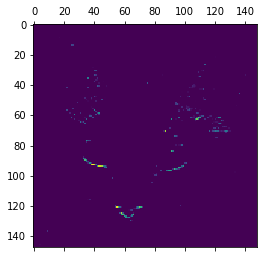

In [25]:
plt.matshow(first_layer[0,:,:,3], cmap = 'viridis')

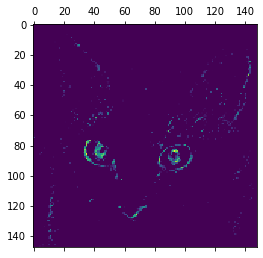

In [43]:
plt.matshow(first_layer[0,:,:,13], cmap = 'viridis')

C:\Users\EMMANU~1\AppData\Local\Temp/ipykernel_12192/2825059231.py:16: RuntimeWarning: invalid value encountered in true_divide
  channel_image /= channel_image.std()


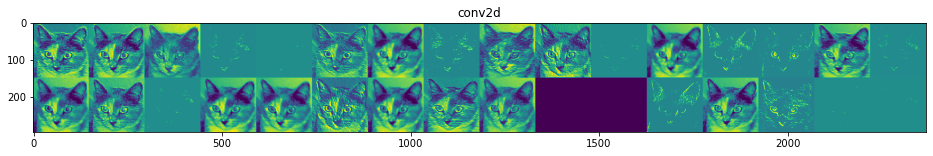

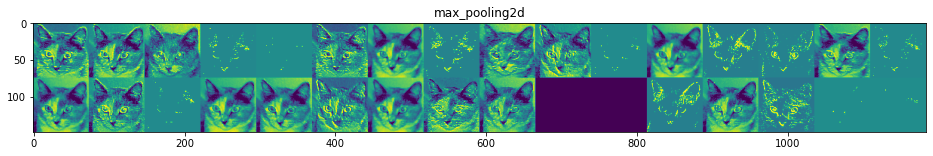

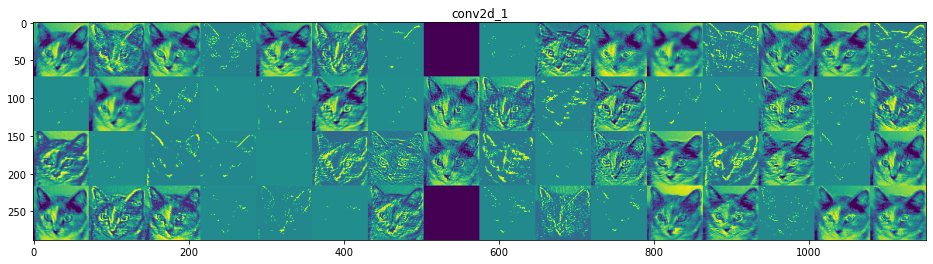

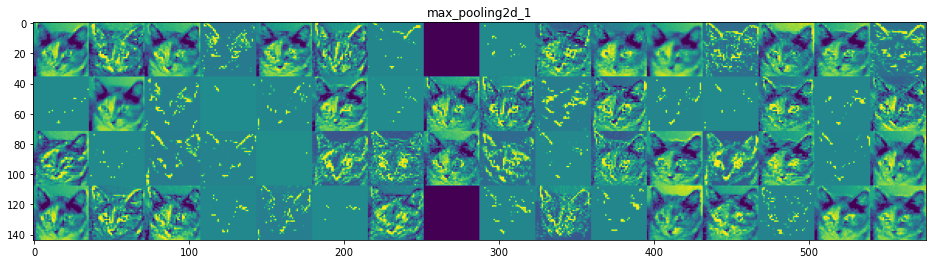

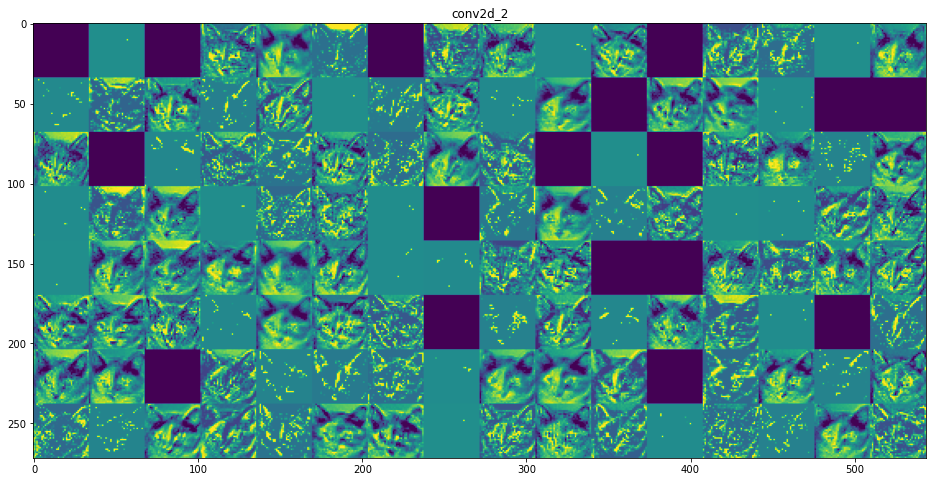

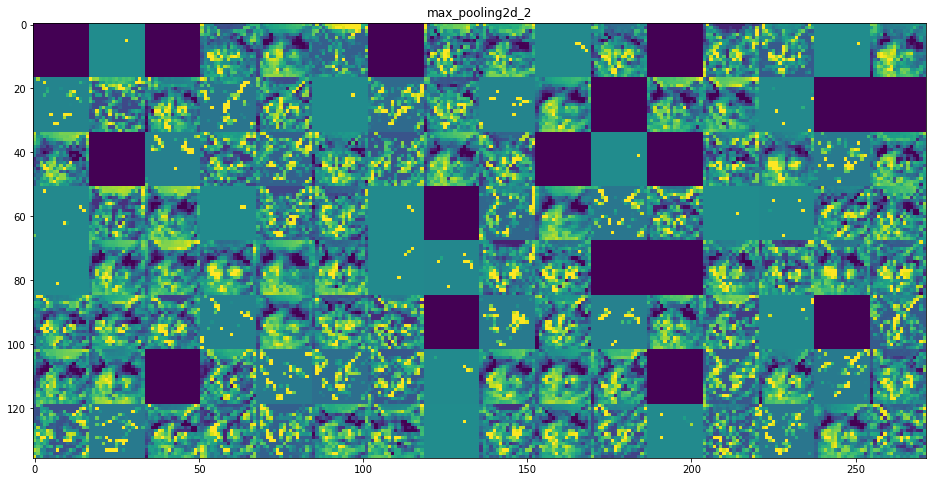

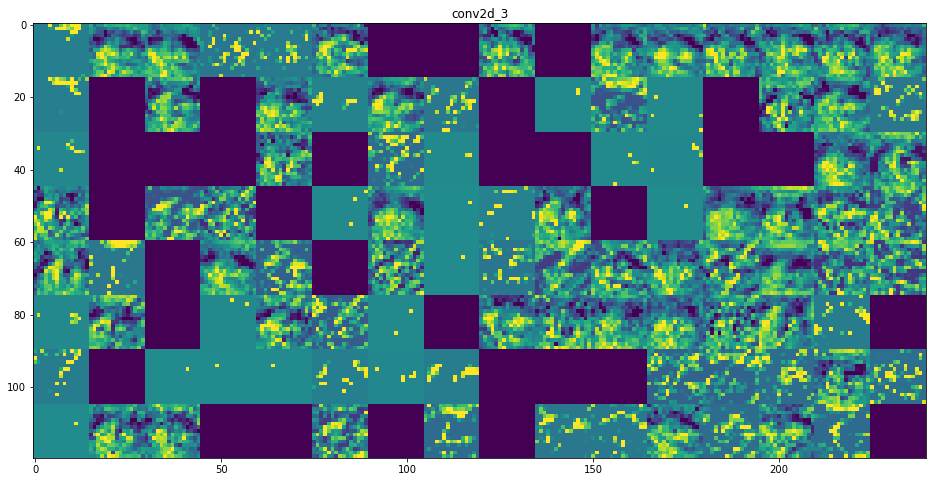

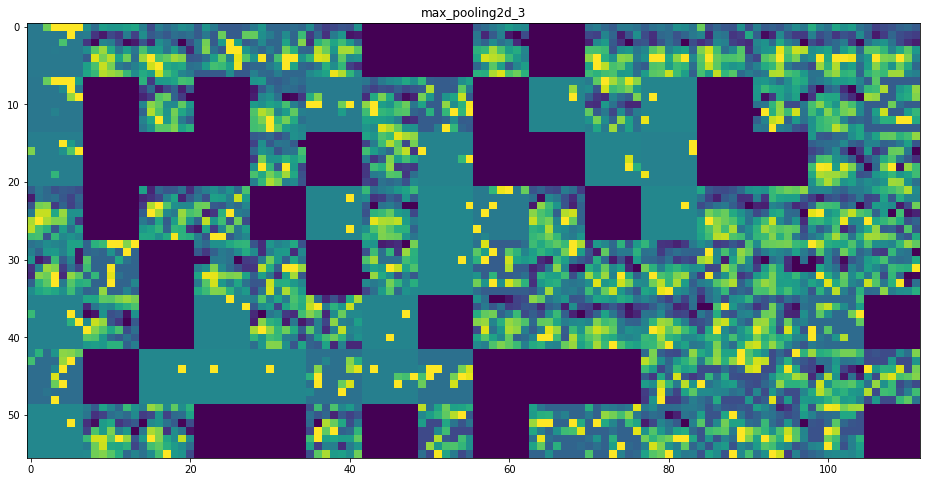

In [41]:
layer_names = []
for layer in model.layers[:8]:
    layer_names.append(layer.name)
    images_per_row = 16
for layer_name, layer_activation in zip(layer_names, activations):
    n_features = layer_activation.shape[-1]
    size = layer_activation.shape[1]
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,
            :, :,
            col * images_per_row + row]
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
            row * size : (row + 1) * size] = channel_image
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
    scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')